# Challenge #13
**Eric Zhou**  
**April 25, 2025**

# Introduction
In Challenge 11, we explored GPU acceleration performance using the FrozenLake environment. We observed that GPU usage provides significant benefits, particularly when the code involves heavy multiplication and accumulation operations. Furthermore, as the problem size increases, the advantages of GPU acceleration become even more pronounced.

In Challenge 13, we aim to dive deeper into GPU programming and optimization through the SAXPY problem. The learning objectives for this challenge include setting up and modifying example CUDA code, profiling and optimizing the implementation, and comparing and visualizing performance as the problem size increases.

# SAXPY Problem

In this challenge, we focus on the example code from [NVIDIA's Easy Introduction to CUDA C](https://developer.nvidia.com/blog/easy-introduction-cuda-c-and-c).

SAXPY stands for **"Single-precision A × X Plus Y"** and serves as a classic "hello world" example for parallel computation.

In the SAXPY operation, we have data Xi and Yi, each element \( i \) performs its own independent computation:

\[
y[i] = a \times x[i] + y[i]
\]

There are no dependencies between elements, meaning each element can be computed independently and in parallel.


# CUDA Kernel
A kernel is a perfect fit because it can run many threads at once, with each thread assigned to one element. Since there are no dependencies between elements, all threads can safely work in parallel without needing to coordinate with each other. This perfectly matches how GPUs are designed — they are built to handle many simple, independent threads working simultaneously, making them ideal for parallel computing tasks like SAXPY.



In [1]:
!nvcc --version # I have intalled the cuda compier!

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2025 NVIDIA Corporation
Built on Fri_Feb_21_20:42:46_Pacific_Standard_Time_2025
Cuda compilation tools, release 12.8, V12.8.93
Build cuda_12.8.r12.8/compiler.35583870_0


In [2]:
!nvcc -o saxpy_benchmark saxpy_benchmark.cu

nvcc fatal   : Cannot find compiler 'cl.exe' in PATH


I failed to run nvcc -o saxpy_benchmark saxpy_benchmark.cu and windows told me 

>nvcc fatal   : Cannot find compiler 'cl.exe' in PATH

I checked with GPT and it told me I have to check back my C ++ installation in my computer. So I installed the Vscode C++ toolchain 2022 as it suggest.

Then I come to open your Windows start menu and Search: x64 Native Tools Command Prompt for VS 2022
cd to your CUDA .cu file folder.

Then compile:

nvcc -o saxpy_benchmark saxpy_benchmark.cu

D:\AI4Hardware_ECE_410_2025_Spring\Challenge_lists\Challenge#13\Code>nvcc -o saxpy_benchmark saxpy_benchmark.cu
saxpy_benchmark.cu
C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.3\include\crt/host_config.h(160): fatal error C1189: #error:  -- unsupported Microsoft Visual Studio version! Only the versions between 2017 and 2019 (inclusive) are supported! The nvcc flag '-allow-unsupported-compiler' can be used to override this version check; however, using an unsupported host compiler may cause compilation failure or incorrect run time execution. Use at your own risk.

D:\AI4Hardware_ECE_410_2025_Spring\Challenge_lists\Challenge#13\Code>nvcc -allow-unsupported-compiler -o saxpy_benchmark saxpy_benchmark.cu
saxpy_benchmark.cu
D:\vscode_installation\VC\Tools\MSVC\14.43.34808\include\yvals_core.h(921): error: static assertion failed with "error STL1002: Unexpected compiler version, expected CUDA 12.4 or newer."

I met with problems above that indicate my version of cuda was too low. I check with the version of cuda that can support my old version of cude 11.3 was the vscode 2019, but I failed to install the 2019 version. My personal computer GPU version is Nvida T600, I checked with GPT and I think it fine to just upgrade my cuda to the newest one. I followed with GPT suggestion to upgrage my cuda software.


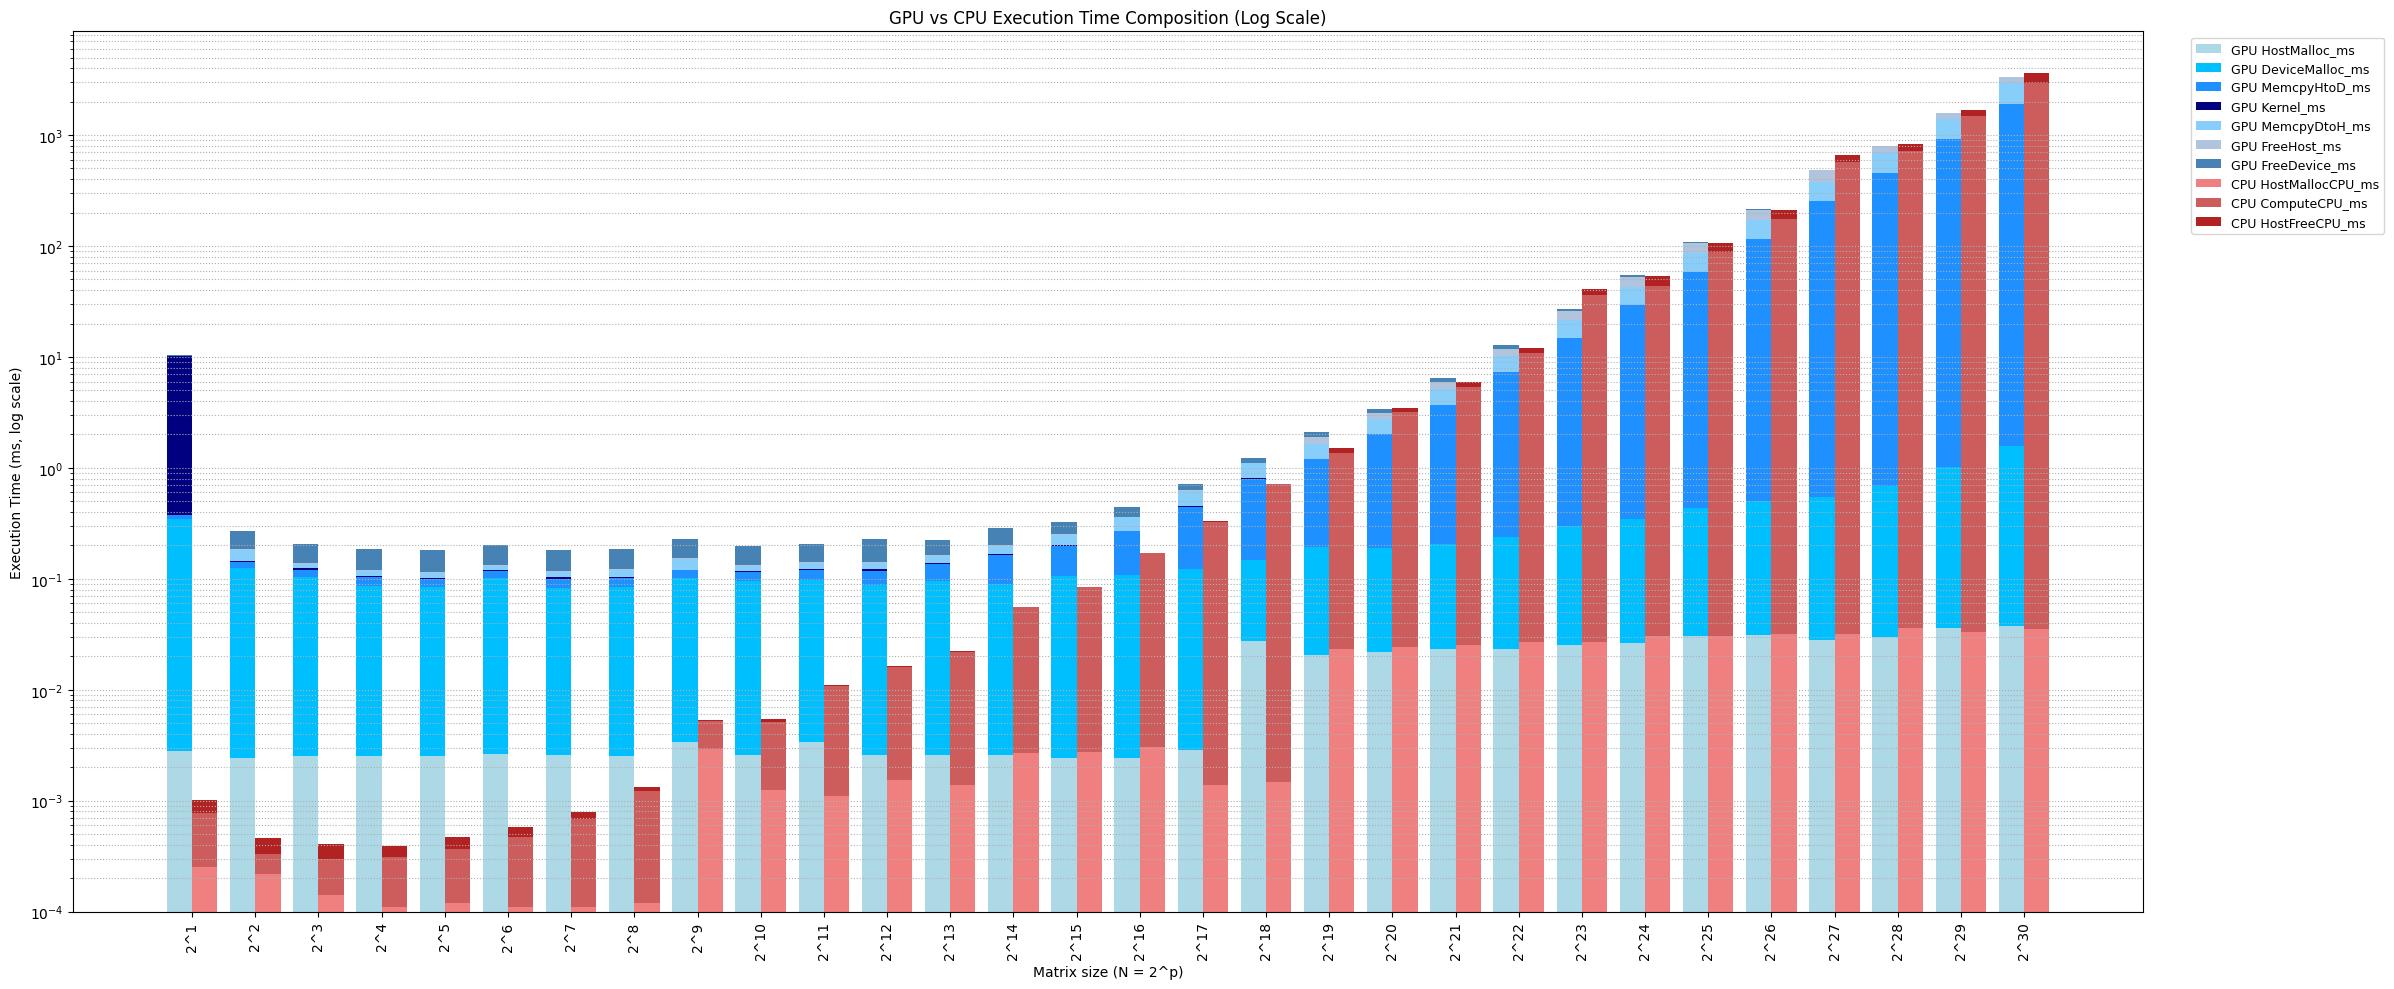

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
# ------------------------------------------------------------------
# 1)  Paste the whole console output between the triple quotes ↓↓↓
# ------------------------------------------------------------------
raw_text= """
MatrixSize,HostMalloc_ms,DeviceMalloc_ms,MemcpyHtoD_ms,Kernel_ms,MemcpyDtoH_ms,FreeHost_ms,FreeDevice_ms,TotalMeasured_ms
Now testing Matrix Size 2^1 = 2 elements
[GPU] 2,0.00278,0.33997,0.03466,9.86726,0.02138,0.00243,0.12653,10.39501
[CPU] 2, 0.00025, 0.00052, 0.00025, 0.00102
Now testing Matrix Size 2^2 = 4 elements
[GPU] 4,0.00243,0.12394,0.01622,0.00339,0.03613,0.00262,0.08704,0.27178
[CPU] 4, 0.00022, 0.00011, 0.00013, 0.00046
Now testing Matrix Size 2^3 = 8 elements
[GPU] 8,0.00253,0.10144,0.01658,0.00346,0.01200,0.00246,0.06755,0.20602
[CPU] 8, 0.00014, 0.00016, 0.00011, 0.00042
Now testing Matrix Size 2^4 = 16 elements
[GPU] 16,0.00253,0.08422,0.01635,0.00336,0.01206,0.00243,0.06448,0.18544
[CPU] 16, 0.00011, 0.00020, 0.00008, 0.00039
Now testing Matrix Size 2^5 = 32 elements
[GPU] 32,0.00253,0.08150,0.01613,0.00202,0.01139,0.00243,0.06522,0.18122
[CPU] 32, 0.00012, 0.00025, 0.00010, 0.00046
Now testing Matrix Size 2^6 = 64 elements
[GPU] 64,0.00262,0.09805,0.01667,0.00205,0.01194,0.00243,0.06733,0.20109
[CPU] 64, 0.00011, 0.00036, 0.00011, 0.00058
Now testing Matrix Size 2^7 = 128 elements
[GPU] 128,0.00256,0.08051,0.01747,0.00240,0.01331,0.00246,0.06448,0.18320
[CPU] 128, 0.00011, 0.00058, 0.00010, 0.00078
Now testing Matrix Size 2^8 = 256 elements
[GPU] 256,0.00253,0.08202,0.01770,0.00240,0.01434,0.00240,0.06426,0.18563
[CPU] 256, 0.00012, 0.00110, 0.00010, 0.00131
Now testing Matrix Size 2^9 = 512 elements
[GPU] 512,0.00339,0.09901,0.01674,0.00202,0.03069,0.00243,0.07318,0.22746
[CPU] 512, 0.00293, 0.00225, 0.00021, 0.00539
Now testing Matrix Size 2^10 = 1024 elements
[GPU] 1024,0.00259,0.09200,0.02022,0.00240,0.01363,0.00243,0.06458,0.19786
[CPU] 1024, 0.00126, 0.00390, 0.00026, 0.00541
Now testing Matrix Size 2^11 = 2048 elements
[GPU] 2048,0.00336,0.09469,0.02192,0.00205,0.01626,0.00243,0.06362,0.20432
[CPU] 2048, 0.00110, 0.00963, 0.00028, 0.01101
Now testing Matrix Size 2^12 = 4096 elements
[GPU] 4096,0.00256,0.08550,0.03018,0.00358,0.01616,0.00243,0.08675,0.22717
[CPU] 4096, 0.00155, 0.01453, 0.00022, 0.01629
Now testing Matrix Size 2^13 = 8192 elements
[GPU] 8192,0.00256,0.09203,0.04090,0.00240,0.02278,0.00243,0.06288,0.22598
[CPU] 8192, 0.00137, 0.02050, 0.00027, 0.02214
Now testing Matrix Size 2^14 = 16384 elements
[GPU] 16384,0.00256,0.08736,0.07418,0.00336,0.03126,0.00243,0.08323,0.28438
[CPU] 16384, 0.00270, 0.05265, 0.00024, 0.05558
Now testing Matrix Size 2^15 = 32768 elements
[GPU] 32768,0.00243,0.10358,0.09155,0.00243,0.05011,0.00275,0.07184,0.32470
[CPU] 32768, 0.00272, 0.08191, 0.00026, 0.08489
Now testing Matrix Size 2^16 = 65536 elements
[GPU] 65536,0.00243,0.10570,0.15910,0.00243,0.08736,0.00243,0.08608,0.44554
[CPU] 65536, 0.00306, 0.16832, 0.00034, 0.17172
Now testing Matrix Size 2^17 = 131072 elements
[GPU] 131072,0.00288,0.11958,0.32586,0.00278,0.16278,0.01203,0.08880,0.71472
[CPU] 131072, 0.00137, 0.32684, 0.00041, 0.32862
Now testing Matrix Size 2^18 = 262144 elements
[GPU] 262144,0.02726,0.12125,0.65299,0.00243,0.29594,0.00243,0.12525,1.22755
[CPU] 262144, 0.00147, 0.71023, 0.00064, 0.71235
Now testing Matrix Size 2^19 = 524288 elements
[GPU] 524288,0.02074,0.17101,1.01734,0.00266,0.43360,0.25078,0.22883,2.12496
[CPU] 524288, 0.02340, 1.32646, 0.14887, 1.49872
Now testing Matrix Size 2^20 = 1048576 elements
[GPU] 1048576,0.02186,0.16797,1.81158,0.00272,0.74650,0.35728,0.30304,3.41094
[CPU] 1048576, 0.02429, 3.14753, 0.28741, 3.45923
Now testing Matrix Size 2^21 = 2097152 elements
[GPU] 2097152,0.02310,0.18426,3.50550,0.00307,1.43002,0.74515,0.52115,6.41226
[CPU] 2097152, 0.02540, 5.33738, 0.61609, 5.97887
Now testing Matrix Size 2^22 = 4194304 elements
[GPU] 4194304,0.02346,0.21347,7.01779,0.00416,2.94435,1.63773,0.86678,12.70774
[CPU] 4194304, 0.02701, 10.72366, 1.28866, 12.03933
Now testing Matrix Size 2^23 = 8388608 elements
[GPU] 8388608,0.02506,0.27190,14.45347,0.00563,6.62778,4.55699,1.29846,27.23930
[CPU] 8388608, 0.02698, 36.35240, 4.81141, 41.19078
Now testing Matrix Size 2^24 = 16777216 elements
[GPU] 16777216,0.02611,0.32019,29.07962,0.00506,13.44336,9.88560,1.46602,54.22595
[CPU] 16777216, 0.03023, 43.86070, 9.57802, 53.46896
Now testing Matrix Size 2^25 = 33554432 elements
[GPU] 33554432,0.03066,0.40291,57.80170,0.00467,28.78211,18.42845,2.45549,107.90599
[CPU] 33554432, 0.03032, 88.50483, 18.83054, 107.36568
Now testing Matrix Size 2^26 = 67108864 elements
[GPU] 67108864,0.03130,0.46851,114.94106,0.00435,56.79753,38.94733,2.57920,213.76927
[CPU] 67108864, 0.03181, 175.29364, 35.64124, 210.96669
Now testing Matrix Size 2^27 = 134217728 elements
[GPU] 134217728,0.02800,0.51741,253.80135,0.00592,122.80508,102.68349,3.12317,482.96442
[CPU] 134217728, 0.03204, 569.05568, 89.40507, 658.49278
Now testing Matrix Size 2^28 = 268435456 elements
[GPU] 268435456,0.02989,0.66339,452.52661,0.00582,229.39961,113.77351,3.20576,799.60455
[CPU] 268435456, 0.03616, 718.77063, 117.98626, 836.79305
Now testing Matrix Size 2^29 = 536870912 elements
[GPU] 536870912,0.03568,0.98218,913.39832,0.00560,466.96600,208.60220,4.11664,1594.10669
[CPU] 536870912, 0.03332, 1473.31672, 207.78423, 1681.13427
Now testing Matrix Size 2^30 = 1073741824 elements
[GPU] 1073741824,0.03792,1.53811,1914.86365,0.00614,1017.28455,412.05893,5.92032,3351.70972
[CPU] 1073741824, 0.03526, 2956.63931, 666.81101, 3623.48558
"""
import pandas as pd
import matplotlib.pyplot as plt



gpu_records = []
cpu_records = []

for line in raw_text.splitlines():
    line = line.strip()
    if line.startswith("[GPU]"):
        parts = line.replace("[GPU]", "").split(",")
        gpu_records.append([int(parts[0])] + [float(x) for x in parts[1:]])
    elif line.startswith("[CPU]"):
        parts = line.replace("[CPU]", "").replace(",", "").split()
        cpu_records.append([int(parts[0])] + [float(x) for x in parts[1:]])

gpu = pd.DataFrame(gpu_records, columns=[
    "MatrixSize",
    "HostMalloc_ms", "DeviceMalloc_ms",
    "MemcpyHtoD_ms", "Kernel_ms",
    "MemcpyDtoH_ms", "FreeHost_ms",
    "FreeDevice_ms", "TotalGPU_ms"
])

cpu = pd.DataFrame(cpu_records, columns=[
    "MatrixSize",
    "HostMallocCPU_ms", "ComputeCPU_ms",
    "HostFreeCPU_ms", "TotalCPU_ms"
])

gpu["Power"] = gpu["MatrixSize"].apply(lambda n: n.bit_length() - 1)
cpu["Power"] = cpu["MatrixSize"].apply(lambda n: n.bit_length() - 1)

# =====================
# Step 2: 绘图
# =====================
plt.figure(figsize=(24,10))

# 横坐标
x = range(len(gpu))
labels = [f"2^{p}" for p in gpu["Power"]]

# --- GPU堆叠 ---
bottom_gpu = None
gpu_stages = [
    ("HostMalloc_ms", "lightblue"),
    ("DeviceMalloc_ms", "deepskyblue"),
    ("MemcpyHtoD_ms", "dodgerblue"),
    ("Kernel_ms", "navy"),
    ("MemcpyDtoH_ms", "lightskyblue"),
    ("FreeHost_ms", "lightsteelblue"),
    ("FreeDevice_ms", "steelblue")
]
for stage, color in gpu_stages:
    plt.bar([i-0.2 for i in x], gpu[stage],
            width=0.4, bottom=bottom_gpu, label=f"GPU {stage}", color=color)
    if bottom_gpu is None:
        bottom_gpu = gpu[stage].copy()
    else:
        bottom_gpu += gpu[stage]

# --- CPU堆叠 ---
bottom_cpu = None
cpu_stages = [
    ("HostMallocCPU_ms", "lightcoral"),
    ("ComputeCPU_ms", "indianred"),
    ("HostFreeCPU_ms", "firebrick")
]
for stage, color in cpu_stages:
    plt.bar([i+0.2 for i in x], cpu[stage],
            width=0.4, bottom=bottom_cpu, label=f"CPU {stage}", color=color)
    if bottom_cpu is None:
        bottom_cpu = cpu[stage].copy()
    else:
        bottom_cpu += cpu[stage]

# --- 样式设置 ---
plt.yscale("log")  
plt.ylim(1e-4, None)  # <<<<<< 强制下界到 1e-4
plt.xticks(x, labels, rotation=90)
plt.ylabel("Execution Time (ms, log scale)")
plt.xlabel("Matrix size (N = 2^p)")
plt.title("GPU vs CPU Execution Time Composition (Log Scale)")
plt.grid(axis="y", linestyle=":", which='both')
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()



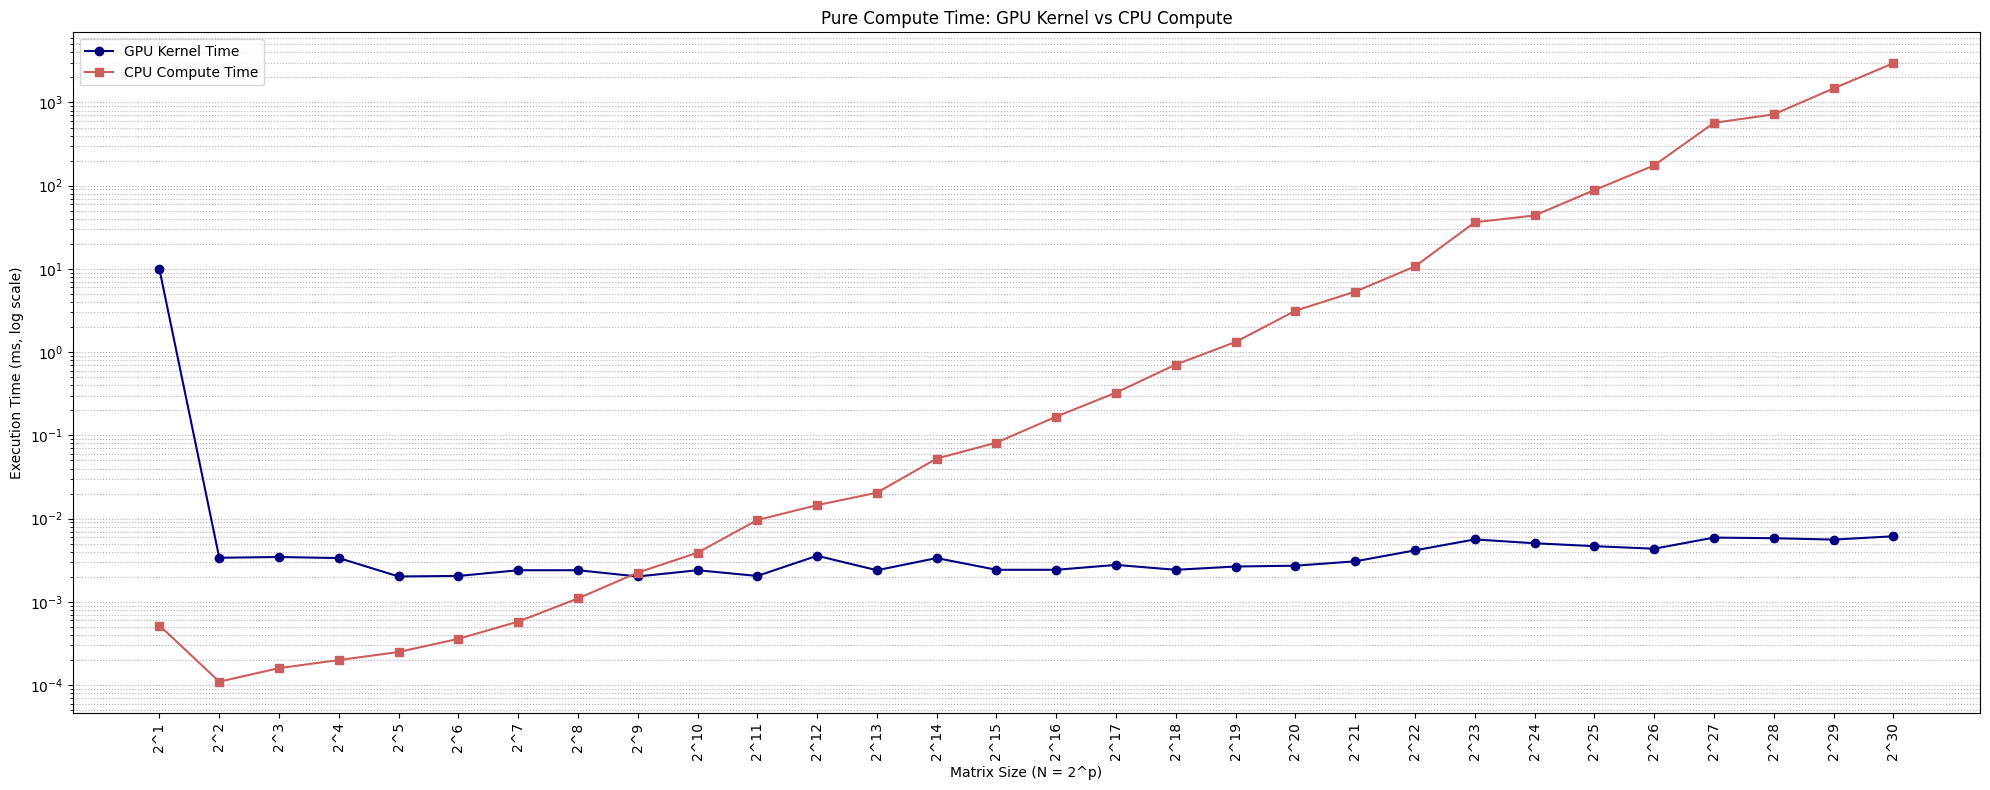

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# ========== 预处理 ==========
gpu_records = []
cpu_records = []

for line in raw_text.splitlines():
    line = line.strip()
    if line.startswith("[GPU]"):
        parts = line.replace("[GPU]", "").split(",")
        gpu_records.append([int(parts[0])] + [float(x) for x in parts[1:]])
    elif line.startswith("[CPU]"):
        parts = line.replace("[CPU]", "").replace(",", "").split()
        cpu_records.append([int(parts[0])] + [float(x) for x in parts[1:]])

gpu = pd.DataFrame(gpu_records, columns=[
    "MatrixSize",
    "HostMalloc_ms", "DeviceMalloc_ms",
    "MemcpyHtoD_ms", "Kernel_ms",
    "MemcpyDtoH_ms", "FreeHost_ms",
    "FreeDevice_ms", "TotalGPU_ms"
])

cpu = pd.DataFrame(cpu_records, columns=[
    "MatrixSize",
    "HostMallocCPU_ms", "ComputeCPU_ms",
    "HostFreeCPU_ms", "TotalCPU_ms"
])

gpu["Power"] = gpu["MatrixSize"].apply(lambda n: n.bit_length() - 1)
cpu["Power"] = cpu["MatrixSize"].apply(lambda n: n.bit_length() - 1)

# ========== 只画纯计算时间 ==========
plt.figure(figsize=(20,8))

x = range(len(gpu))
labels = [f"2^{p}" for p in gpu["Power"]]

# Plot
plt.plot(x, gpu["Kernel_ms"], marker='o', label="GPU Kernel Time", color="navy")
plt.plot(x, cpu["ComputeCPU_ms"], marker='s', label="CPU Compute Time", color="indianred")

# 样式
plt.yscale("log")
plt.xticks(x, labels, rotation=90)
plt.xlabel("Matrix Size (N = 2^p)")
plt.ylabel("Execution Time (ms, log scale)")
plt.title("Pure Compute Time: GPU Kernel vs CPU Compute")
plt.grid(axis='y', linestyle=':', which='both')
plt.legend()
plt.tight_layout()
plt.show()


# Comment
I benchmarked SAXPY on Colab using a CPU (single-core hyper-threaded Xeon processor @ 2.3 GHz) and a Tesla K80 GPU. I observe if the computation size isn't large enough, actuallly more time is spent on data transfer and extra memory allocation. Although the GPU did achieve better computation time, the overall performance didn't significantly outperform the CPU due to data transfer and extra memory allocation.
